<a href="https://colab.research.google.com/github/Dhanalaxmi3103/Data_Science_Workshop/blob/main/LogisticRegression_Spam_or_ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Spam Classification**

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam_email_dataset.csv to spam_email_dataset.csv


In [ ]:
dataset=pd.read_csv("spam_email_dataset.csv")
dataset.head()

,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,gregorysmith@example.org,13-02-2023,04:13,3,0,191,32,3,3,0,11,1,1
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,gonzalezdaniel@example.net,09-08-2023,06:15,3,9,45,1,2,1,2,8,2,1
2,jill43@example.com,Environmental commercial off seem any conference.,david88@example.net,michellebaker@example.net,16-05-2023,01:32,3,9,52,1,4,0,2,10,1,1
3,johnsonkaren@example.org,Smile real TV father commercial day increase.,lindaalvarez@example.com,schroedertodd@example.com,25-04-2023,14:50,2,3,75,6,0,2,0,8,2,0
4,markwilson@example.org,Fast stage he oil institution.,vstafford@example.com,emilywilliams@example.com,11-07-2023,21:44,3,5,299,279,0,2,0,6,1,1


About Dataset

Description

This dataset contains synthetic data designed for practicing spam email classification. The dataset includes various features extracted from email messages, such as the email's content, sender and recipient information, as well as metadata like date and time of sending, attachment count, link count, and more.

Columns

Email: The email address of the sender.

Subject: The subject line of the email.

Sender: The email address of the sender.

Recipient: The email address of the recipient.

Date: The date when the email was sent.

Time (24 hours format): The time of day when the email was sent (in 24-hour format).

Attachments: The number of attachments present in the email.

Link Count: The number of hyperlinks present in the email.

Word Count: The total number of words in the email.

Uppercase Count: The count of words in uppercase letters.

Exclamation Count: The count of exclamation marks in the email.

Question Count: The count of question marks in the email.

Dollar Count: The count of dollar signs in the email.

Punctuation Count: The count of various punctuation marks (e.g., commas, periods).

HTML Tags Count: The count of HTML tags in the email.

Spam Indicator: A binary label indicating whether the email is spam (1) or not (0).

**Exploaratory Data Analysis**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Email              6000 non-null   object
 1   Subject            6000 non-null   object
 2   Sender             6000 non-null   object
 3   Recipient          6000 non-null   object
 4   Date               6000 non-null   object
 5   Time               6000 non-null   object
 6   Attachments        6000 non-null   int64 
 7   Link Count         6000 non-null   int64 
 8   Word Count         6000 non-null   int64 
 9   Uppercase Count    6000 non-null   int64 
 10  Exclamation Count  6000 non-null   int64 
 11  Question Count     6000 non-null   int64 
 12  Dollar Count       6000 non-null   int64 
 13  Punctuation Count  6000 non-null   int64 
 14  HTML Tags Count    6000 non-null   int64 
 15  Spam Indicator     6000 non-null   int64 
dtypes: int64(10), object(6)
memory usage: 750.

In [ ]:
#Checking for null values
dataset.isnull().sum()

,0
Email,0
Subject,0
Sender,0
Recipient,0
Date,0
Time,0
Attachments,0
Link Count,0
Word Count,0
Uppercase Count,0


In [ ]:
#Dataset Describing
dataset.describe()

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,1.497833,5.005500,153.269500,75.997667,2.481833,1.486000,0.989500,7.549667,2.528833,0.497000
std,1.125555,3.166092,83.135747,64.735568,1.717895,1.118785,0.812301,4.624619,1.703522,0.500033
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,83.000000,23.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,1.000000,5.000000,154.000000,59.000000,2.000000,1.000000,1.000000,8.000000,3.000000,0.000000
75%,3.000000,8.000000,223.000000,114.000000,4.000000,2.000000,2.000000,12.000000,4.000000,1.000000
max,3.000000,10.000000,300.000000,300.000000,5.000000,3.000000,2.000000,15.000000,5.000000,1.000000


In [ ]:
#columns in dataset
dataset.columns

Index(['Email', 'Subject', 'Sender', 'Recipient', 'Date', 'Time',
       'Attachments', 'Link Count', 'Word Count', 'Uppercase Count',
       'Exclamation Count', 'Question Count', 'Dollar Count',
       'Punctuation Count', 'HTML Tags Count', 'Spam Indicator'],
      dtype='object')

In [ ]:
dataset.drop(['Email','Subject','Sender','Recipient','Date','Time'],axis=1,inplace=True)
dataset.head()

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,3,0,191,32,3,3,0,11,1,1
1,3,9,45,1,2,1,2,8,2,1
2,3,9,52,1,4,0,2,10,1,1
3,2,3,75,6,0,2,0,8,2,0
4,3,5,299,279,0,2,0,6,1,1


In [ ]:
#Dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Attachments        6000 non-null   int64
 1   Link Count         6000 non-null   int64
 2   Word Count         6000 non-null   int64
 3   Uppercase Count    6000 non-null   int64
 4   Exclamation Count  6000 non-null   int64
 5   Question Count     6000 non-null   int64
 6   Dollar Count       6000 non-null   int64
 7   Punctuation Count  6000 non-null   int64
 8   HTML Tags Count    6000 non-null   int64
 9   Spam Indicator     6000 non-null   int64
dtypes: int64(10)
memory usage: 468.9 KB


In [ ]:
#Dateset Decribing
dataset.describe()

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,1.497833,5.005500,153.269500,75.997667,2.481833,1.486000,0.989500,7.549667,2.528833,0.497000
std,1.125555,3.166092,83.135747,64.735568,1.717895,1.118785,0.812301,4.624619,1.703522,0.500033
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,83.000000,23.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,1.000000,5.000000,154.000000,59.000000,2.000000,1.000000,1.000000,8.000000,3.000000,0.000000
75%,3.000000,8.000000,223.000000,114.000000,4.000000,2.000000,2.000000,12.000000,4.000000,1.000000
max,3.000000,10.000000,300.000000,300.000000,5.000000,3.000000,2.000000,15.000000,5.000000,1.000000


# **Analysis of Independent Features**

**Analysis of Attachments**

,count
Attachments,
0,1526
3,1524
1,1485
2,1465


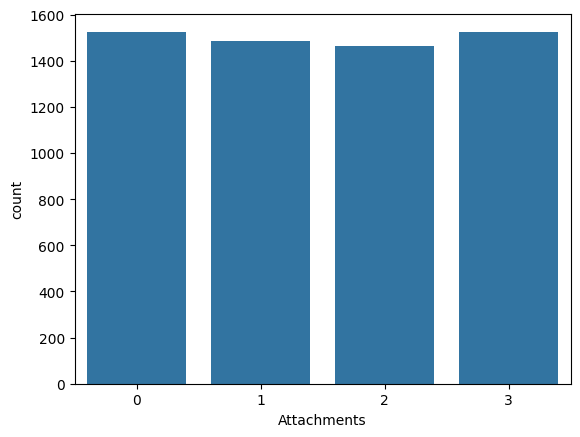

In [ ]:
#Analysis of Attachments
sns.countplot(x='Attachments', data=dataset)
dataset['Attachments'].value_counts()

,Attachments,Spam Indicator
0,0,747
1,1,721
2,2,750
3,3,764


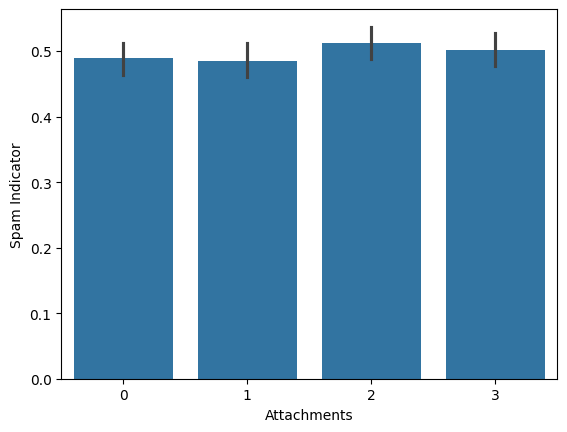

In [ ]:
#Plotting relationship between Attachments and Spam Indicator
sns.barplot(x='Attachments',y='Spam Indicator',data=dataset)
dataset.groupby('Attachments',as_index=False)['Spam Indicator'].sum()

<Axes: xlabel='Attachments', ylabel='count'>

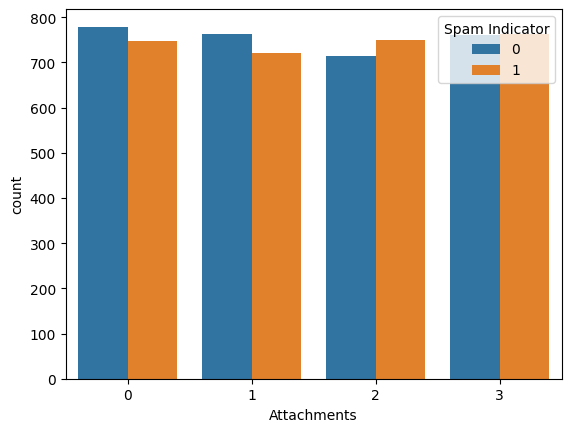

In [ ]:
#Number of spam messages based on Attachments
sns.countplot(x='Attachments',hue='Spam Indicator',data=dataset)

**Analysis of Link Count**

,count
Link Count,
2,584
10,558
4,556
5,555
9,554
8,547
1,538
3,533
0,530


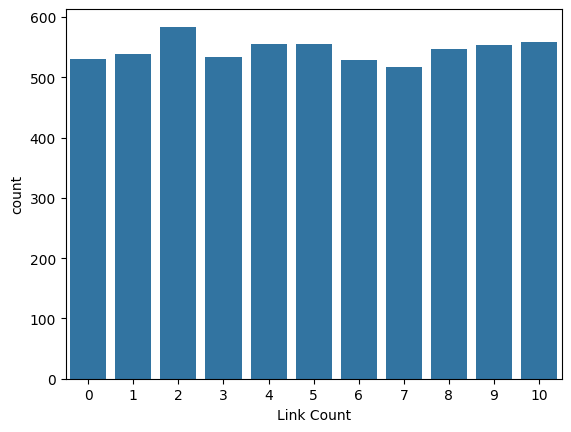

In [ ]:
sns.countplot(x='Link Count',data=dataset)
dataset['Link Count'].value_counts()

,Link Count,Spam Indicator
0,0,261
1,1,270
2,2,294
3,3,269
4,4,273
5,5,283
6,6,253
7,7,254
8,8,261
9,9,257


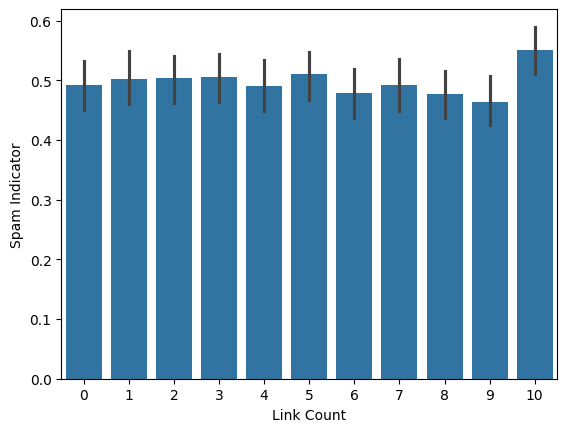

In [ ]:
#Plotting relation between  Link Count and Spam
sns.barplot(x='Link Count',y='Spam Indicator',data=dataset)
dataset.groupby("Link Count",as_index=False)['Spam Indicator'].sum()

<Axes: xlabel='Link Count', ylabel='count'>

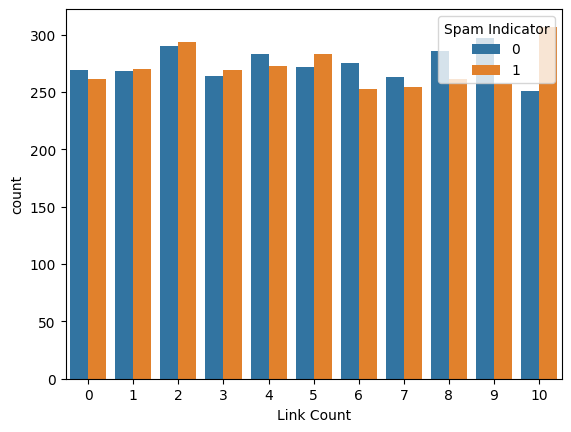

In [ ]:
#Number of spam messages based on Link Count
sns.countplot(x='Link Count',hue='Spam Indicator',data=dataset)

**Analysis of Word Count**

,Exclamation Count,Spam Indicator
0,0,531
1,1,487
2,2,481
3,3,493
4,4,484
5,5,506


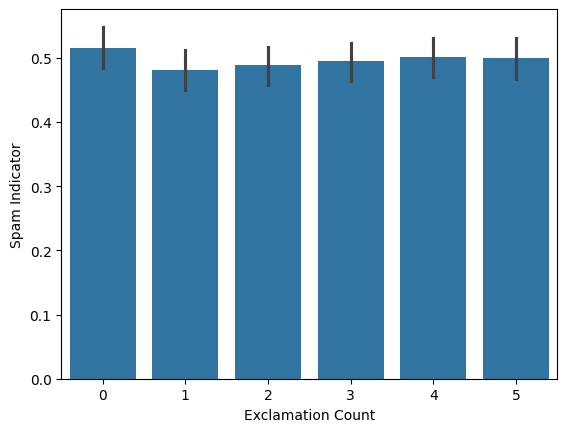

In [ ]:
#Plotting realtion between Exclamation Count and Spam Indicator
sns.barplot(x='Exclamation Count',y='Spam Indicator',data=dataset)
dataset.groupby('Exclamation Count',as_index=False)['Spam Indicator'].sum()

<Axes: xlabel='Exclamation Count', ylabel='count'>

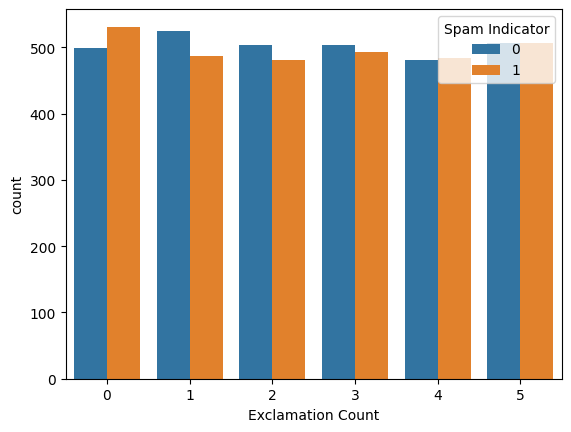

In [ ]:
#count of  Spam messages based on Exclamation Count
sns.countplot(x='Exclamation Count',hue='Spam Indicator',data=dataset)

**Analysis of Question Count**

,Question Count,Spam Indicator
0,0,780
1,1,769
2,2,736
3,3,697


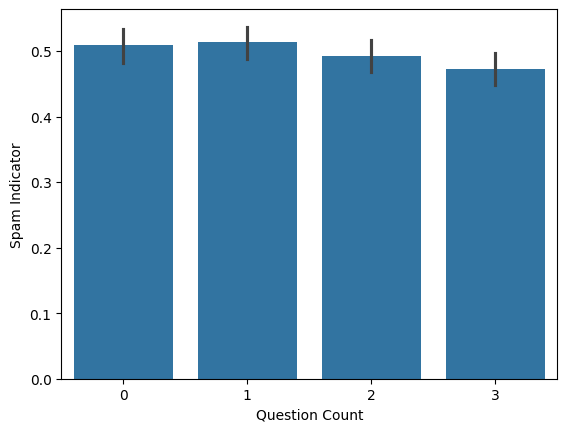

In [ ]:
sns.barplot(x='Question Count',y='Spam Indicator',data=dataset)
dataset.groupby('Question Count',as_index=False)['Spam Indicator'].sum()

<Axes: xlabel='Question Count', ylabel='count'>

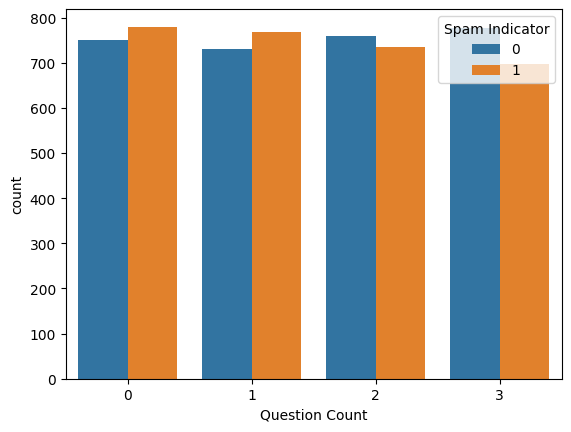

In [ ]:
#count of  Spam messages based on Question Count
sns.countplot(x='Question Count',hue='Spam Indicator',data=dataset)

**Analysis of Dollar Count**

,Dollar Count,Spam Indicator
0,0,1000
1,1,1038
2,2,944


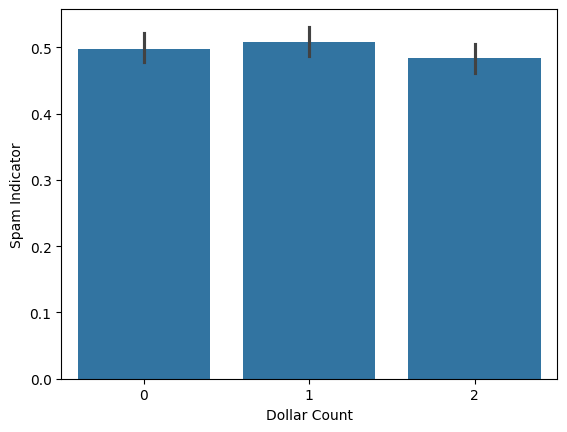

In [ ]:
sns.barplot(x='Dollar Count',y='Spam Indicator',data=dataset)
dataset.groupby('Dollar Count',as_index=False)['Spam Indicator'].sum()

<Axes: xlabel='Dollar Count', ylabel='count'>

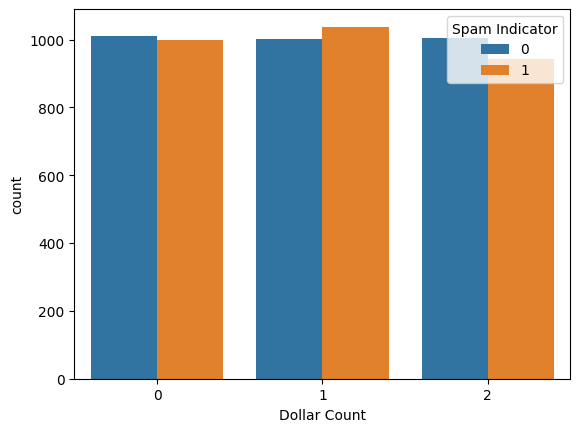

In [ ]:
#count of  Spam messages based on Dollar Count
sns.countplot(x='Dollar Count',hue='Spam Indicator',data=dataset)

**Analysis of Punctuation Count**

,Punctuation Count,Spam Indicator
0,0,188
1,1,182
2,2,182
3,3,208
4,4,169
5,5,184
6,6,192
7,7,173
8,8,177
9,9,191


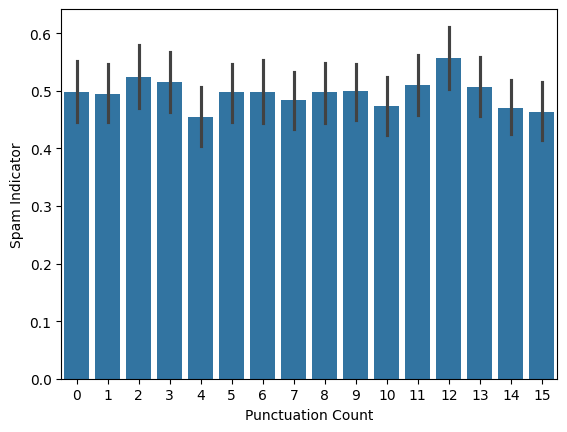

In [ ]:
sns.barplot(x='Punctuation Count',y='Spam Indicator',data=dataset)
dataset.groupby('Punctuation Count',as_index=False)['Spam Indicator'].sum()

<Axes: xlabel='Punctuation Count', ylabel='count'>

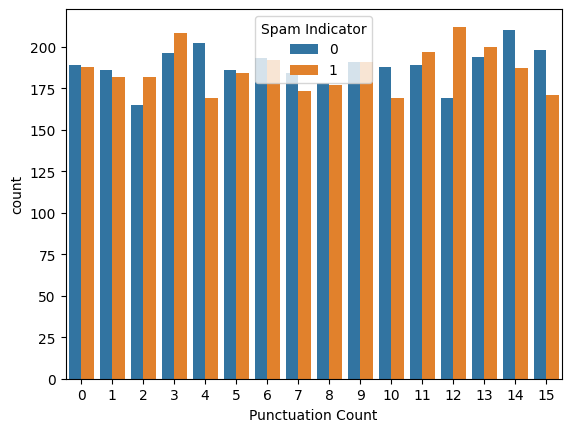

In [ ]:
#count of  Spam messages based on Punctuation Count
sns.countplot(x='Punctuation Count',hue='Spam Indicator',data=dataset)

**Analysis of HTML Tags Count**

,HTML Tags Count,Spam Indicator
0,0,490
1,1,475
2,2,492
3,3,511
4,4,507
5,5,507


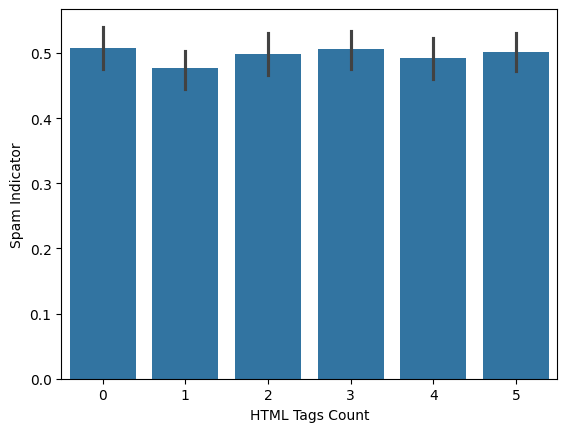

In [ ]:
sns.barplot(x='HTML Tags Count',y='Spam Indicator',data=dataset)
dataset.groupby('HTML Tags Count',as_index=False)['Spam Indicator'].sum()

<Axes: xlabel='HTML Tags Count', ylabel='count'>

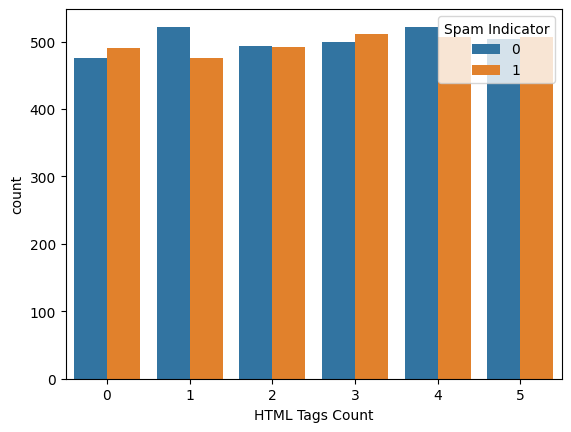

In [ ]:
#count of  Spam messages based on HTML Tags Count
sns.countplot(x='HTML Tags Count',hue='Spam Indicator',data=dataset)

,count
Spam Indicator,
0,3018
1,2982


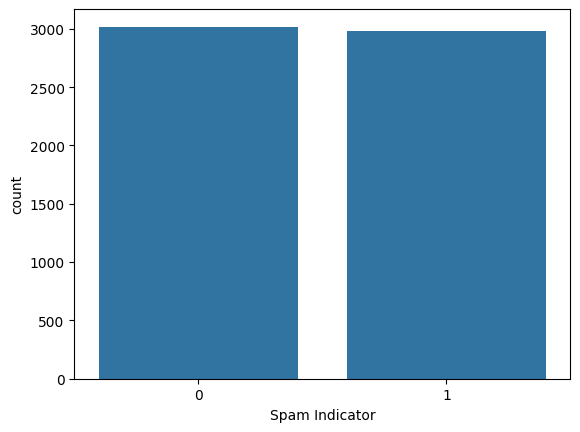

In [ ]:
sns.countplot(x='Spam Indicator',data=dataset)
dataset['Spam Indicator'].value_counts()

In [ ]:
#Correlation MAtrix
dataset.corr()


,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
Attachments,1.000000,0.028701,-0.002115,0.002887,-0.020107,0.004543,0.019392,0.010445,-0.004140,0.013761
Link Count,0.028701,1.000000,0.022396,0.009577,0.008401,0.012846,-0.000626,0.001353,0.024588,0.001327
Word Count,-0.002115,0.022396,1.000000,0.635817,0.005551,-0.000697,0.000358,-0.002474,0.024591,-0.006414
Uppercase Count,0.002887,0.009577,0.635817,1.000000,0.006226,0.004274,-0.006474,0.021011,0.007838,-0.008214
Exclamation Count,-0.020107,0.008401,0.005551,0.006226,1.000000,-0.005900,-0.003063,0.004048,-0.008308,-0.001325
Question Count,0.004543,0.012846,-0.000697,0.004274,-0.005900,1.000000,0.004516,-0.006825,0.004366,-0.029574
Dollar Count,0.019392,-0.000626,0.000358,-0.006474,-0.003063,0.004516,1.000000,-0.031034,-0.006467,-0.010132
Punctuation Count,0.010445,0.001353,-0.002474,0.021011,0.004048,-0.006825,-0.031034,1.000000,-0.016591,-0.004693
HTML Tags Count,-0.004140,0.024588,0.024591,0.007838,-0.008308,0.004366,-0.006467,-0.016591,1.000000,0.002743
Spam Indicator,0.013761,0.001327,-0.006414,-0.008214,-0.001325,-0.029574,-0.010132,-0.004693,0.002743,1.000000


# **Model fitting**

**Setting Independent and Dependent features**

In [ ]:
X=dataset.drop('Spam Indicator',axis=1)
Y=dataset['Spam Indicator']

**Splitting the dataset**

In [ ]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

**Fitting Logistic Regression**

In [ ]:
#Fitting the Logistic Regression model
from sklearn.linear_model import LogisticRegression
spam_model= LogisticRegression()
spam_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Predictiong using Model**

In [ ]:
#Predicting using x_test
spam_pred=spam_model.predict(X_test)
#printing the predicted values
spam_pred

array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
#Printing Actual Values and Predicted Values
pred=pd.DataFrame({'Actual Values':y_test,'Predicted Values':spam_pred})
pred.head()

,Actual Values,Predicted Values
1637,1,1
1381,1,0
2714,1,0
2556,1,0
586,0,0


**Evaluating the model**

In [ ]:
#Confusion matrix and classification report
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


Text(50.722222222222214, 0.5, 'True')

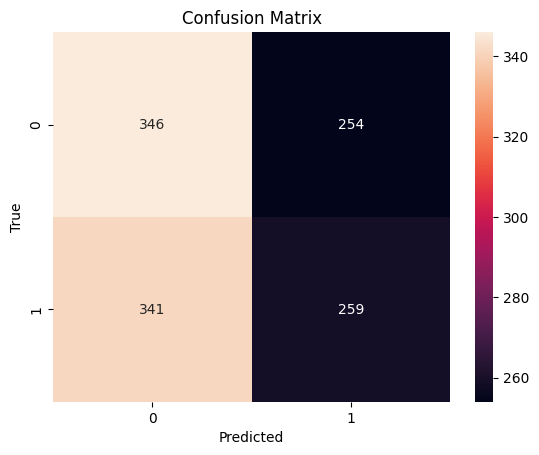

In [ ]:
matrix = confusion_matrix(y_test, spam_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')


In [ ]:
#Classification report
print("Classification report")
print(classification_report(y_test,spam_pred))

Classification report
              precision    recall  f1-score   support

           0       0.50      0.58      0.54       600
           1       0.50      0.43      0.47       600

    accuracy                           0.50      1200
   macro avg       0.50      0.50      0.50      1200
weighted avg       0.50      0.50      0.50      1200

